In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df=pd.read_csv(r'C:\Users\harshpreet\Downloads/zomato.csv', encoding='utf-8')
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [112]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [113]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [114]:
len(df)

51717

In [115]:
df.shape

(51717, 17)

# finding missing values and then dealing with them

In [7]:
null_values=dict(df.isnull().sum())

In [116]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [117]:
null_values

{'url': 0,
 'address': 0,
 'name': 0,
 'online_order': 0,
 'book_table': 0,
 'rate': 7775,
 'votes': 0,
 'phone': 1208,
 'location': 21,
 'rest_type': 227,
 'dish_liked': 28078,
 'cuisines': 45,
 'approx_cost(for two people)': 346,
 'reviews_list': 0,
 'menu_item': 0,
 'listed_in(type)': 0,
 'listed_in(city)': 0}

In [118]:
null_values.keys()

dict_keys(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'])

In [119]:
null_values.items()

dict_items([('url', 0), ('address', 0), ('name', 0), ('online_order', 0), ('book_table', 0), ('rate', 7775), ('votes', 0), ('phone', 1208), ('location', 21), ('rest_type', 227), ('dish_liked', 28078), ('cuisines', 45), ('approx_cost(for two people)', 346), ('reviews_list', 0), ('menu_item', 0), ('listed_in(type)', 0), ('listed_in(city)', 0)])

In [120]:
for i,k in null_values.items():
    if k>0:
        print(i,'has',np.round(k/len(df)*100,4),'missing values')
    
    else:
        continue

rate has 15.0337 missing values
phone has 2.3358 missing values
location has 0.0406 missing values
rest_type has 0.4389 missing values
dish_liked has 54.2916 missing values
cuisines has 0.087 missing values
approx_cost(for two people) has 0.669 missing values


# dealing with the rate column for the analysis

In [121]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [122]:
df.dropna(subset=['rate'],axis='index',inplace=True)
df.shape

(43942, 17)

In [123]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [124]:
df2=df.copy()


In [126]:
def split(x):
    return x.split('/')[0]

In [127]:
df['rate']=df['rate'].apply(split)

In [128]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table rate  votes                             phone  \
0          Yes        Yes  4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787                      080 41714161   
2          Yes         No  3.8    918                    +91 9663487993   
3           No         No  3.7     88                    +91 9620009302   
4           No         No  3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [129]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [130]:
df.replace('NEW',0,inplace=True)
df.replace('-',0,inplace=True)

In [131]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [132]:
df['rate'].dtype

dtype('O')

In [133]:
df['rate']=df['rate'].astype(float)

In [134]:
df['rate'].dtype

dtype('float64')

# in depth analysis of the restaurants

In [135]:
df2=df.copy()

In [136]:
df2['sum_rate']=df2['rate']*df2['votes']

In [137]:
df2.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  sum_rate  
0          Buffet    Banashankari    3177.5  
1          Buffet    Banashankari    3226.7  
2          Buffet    Banashankari    3488.4  
3          Buffet    Banashankari     325.6  
4          Buffet    Banashankari     630.8

In [138]:
df3=df2.groupby('name')[('votes'),('sum_rate')].sum().reset_index()

<ipython-input-138-e201b83b7eba>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [139]:
df3.head()

name  votes  sum_rate
0                          #FeelTheROLL     14      47.6
1                            #L-81 Cafe    432    1684.8
2                               #refuel    111     410.7
3                              1000 B.C    294     940.8
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C    123     455.1

In [140]:
df3['Avg_Rating']=df3['sum_rate']/df3['votes']


In [141]:
df3.head(10)

name  votes  sum_rate  Avg_Rating
0                          #FeelTheROLL     14      47.6    3.400000
1                            #L-81 Cafe    432    1684.8    3.900000
2                               #refuel    111     410.7    3.700000
3                              1000 B.C    294     940.8    3.200000
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C    123     455.1    3.700000
5            11 to 11 Express Biriyanis     44     154.0    3.500000
6                    1131 Bar + Kitchen  16938   76198.2    4.498654
7             12th Main - Grand Mercure   3541   14518.1    4.100000
8                         1441 Pizzeria    664    2722.4    4.100000
9                        1522 - The Pub  41172  173213.1    4.207061

In [142]:
df3.rename(columns={'name':'Restaurant'},inplace=True)

In [143]:
df3.drop(['votes','sum_rate'],axis=1,inplace=True)
df3.head()

Restaurant  Avg_Rating
0                          #FeelTheROLL         3.4
1                            #L-81 Cafe         3.9
2                               #refuel         3.7
3                              1000 B.C         3.2
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C         3.7

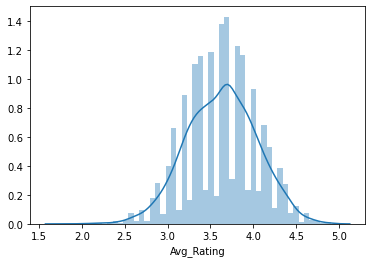

In [144]:
sns.distplot(df3['Avg_Rating'])

# Top restaurants chains in bengaluru

# checking the popularity of the reastaurant

In [145]:
df4=pd.DataFrame(df.groupby('name')['votes'].sum().reset_index())
df4.head()

name  votes
0                          #FeelTheROLL     14
1                            #L-81 Cafe    432
2                               #refuel    111
3                              1000 B.C    294
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C    123

In [146]:
df4.sort_values(by=['votes'],ascending=False,inplace=True)

In [147]:
df4.head()

name   votes
4540             Onesta  347520
6742           Truffles  301059
2028  Empire Restaurant  229808
2537           Hammered  180602
6289    The Black Pearl  172122

In [148]:
df5=df4.head(20)

In [149]:
df5.head(20)

name   votes
4540                       Onesta  347520
6742                     Truffles  301059
2028            Empire Restaurant  229808
2537                     Hammered  180602
6289              The Black Pearl  172122
3929                Meghana Foods  129557
639               Barbeque Nation  108425
5629          Smally's Resto Cafe  102877
1037  Byg Brewski Brewing Company   99531
2363             Gilly's Restobar   98808
427         Arbor Brewing Company   92362
2799             House Of Commons   90573
1503                Chutney Chang   89910
2107   Fenny's Lounge And Kitchen   89183
100     AB's - Absolute Barbecues   86418
1499         Church Street Social   83179
4841               Prost Brew Pub   78609
6273               The Biere Club   76649
5930                       Stoner   75194
3432           Koramangala Social   75021

Text(0.5, 1.0, 'The most famous restaurants based on the number of reviews')

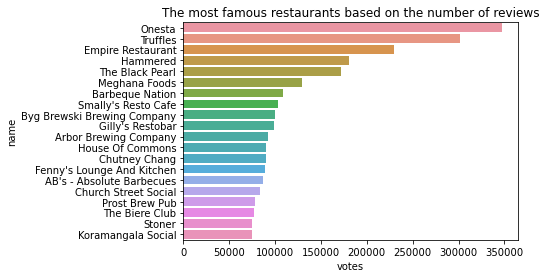

In [150]:
sns.barplot(y='name',x='votes',data=df5)
plt.title('The most famous restaurants based on the number of reviews')

# restaurants popularity based upon the number of chains in bengaluru

In [151]:
chains=pd.DataFrame(df['name'].value_counts()[:20].reset_index())

In [43]:
chains.head(21)

index  name
0       Cafe Coffee Day    89
1                Onesta    85
2     Empire Restaurant    71
3     Five Star Chicken    68
4             Just Bake    68
5          Kanti Sweets    68
6                 Petoo    64
7        Baskin Robbins    63
8             Pizza Hut    62
9            Polar Bear    61
10        Beijing Bites    60
11          Sweet Truth    60
12       Domino's Pizza    60
13                  KFC    60
14                Smoor    59
15               Subway    59
16           McDonald's    59
17               Faasos    57
18          Burger King    55
19  Smally's Resto Cafe    54

Text(0.5, 0, 'number of outlets in bengaluru')

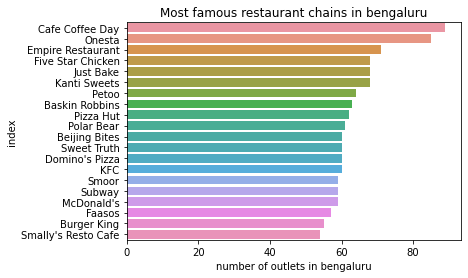

In [152]:
sns.barplot(y='index',x='name',data=chains)
plt.title('Most famous restaurant chains in bengaluru')
plt.xlabel('number of outlets in bengaluru')

# how many restaurants accept online orders and how many do not

In [153]:
x=df['online_order'].value_counts()
x

Yes    28308
No     15634
Name: online_order, dtype: int64

In [154]:
import plotly.express as px

In [155]:
px.pie(values=x, names=['yes','no'])

# checking on the restaurants having dine in or not

In [156]:
x=df['book_table'].value_counts()
x

No     37509
Yes     6433
Name: book_table, dtype: int64

In [157]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [158]:
label=['not booked', 'booked']

In [159]:
px.pie(values=x, names=label)

# indepth analysis of the types of restaurants

In [160]:
df['rest_type'].isna().sum()

151

In [161]:
df['rest_type'].dropna(inplace=True)

In [162]:
df['rest_type'].isna().sum()

0

In [163]:
len(df['rest_type'].unique())

87

In [164]:
y=df['rest_type'].value_counts()[:20]
y

Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
Takeaway, Delivery             1472
Casual Dining, Bar             1141
Bakery                          775
Beverage Shop                   704
Bar                             661
Food Court                      526
Bar, Casual Dining              420
Lounge                          396
Pub                             356
Sweet Shop                      351
Fine Dining                     343
Casual Dining, Cafe             319
Pub, Casual Dining              255
Beverage Shop, Quick Bites      244
Bakery, Quick Bites             234
Name: rest_type, dtype: int64

In [165]:
px.pie(values=y, names=df['rest_type'].value_counts()[:20].index)

In [166]:
#bar plot for the same above pie chart
trace1=go.Bar(x=df['rest_type'].value_counts()[:20].index, y=df['rest_type'].value_counts()[:20])
iplot([trace1])

In [167]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [168]:
b=df.groupby('location')['votes'].count().reset_index()
b.sort_values(by='votes', ascending=False, inplace=True)
b.head()

location  votes
0                     BTM   4261
44  Koramangala 5th Block   2381
22                    HSR   2128
27            Indiranagar   1936
29               JP Nagar   1849

In [169]:
df['location'].value_counts()

BTM                      4261
Koramangala 5th Block    2381
HSR                      2128
Indiranagar              1936
JP Nagar                 1849
                         ... 
West Bangalore              5
Yelahanka                   5
Rajarajeshwari Nagar        2
Peenya                      1
Nagarbhavi                  1
Name: location, Length: 92, dtype: int64

In [170]:
trace2=go.Bar(x=df['location'].value_counts().index, y=df['location'].value_counts()[:20])
iplot([trace2])

# analysing the approx cost for two people

In [63]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', nan, '2,200',
       '2,000', '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000',
       '2,800', '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400',
       '2,600', '1,450', '70', '3,200', '560', '240', '360', '6,000',
       '1,050', '2,300', '4,100', '120', '5,000', '3,700', '1,650',
       '2,700', '4,500'], dtype=object)

In [64]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [65]:
df.dropna(subset=['approx_cost(for two people)'], axis=0, inplace=True)

In [66]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            591
location                           0
rest_type                        149
dish_liked                     20216
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [67]:
def replace(x):
    return x.replace(',', '')

In [68]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(replace)

In [69]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [70]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [71]:
df['approx_cost(for two people)'].dtype

dtype('int32')

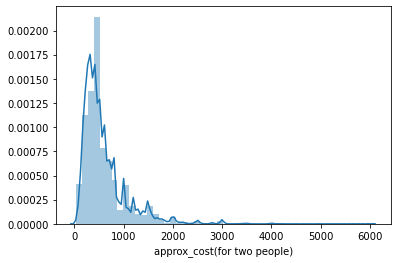

In [72]:
sns.distplot(df['approx_cost(for two people)'])

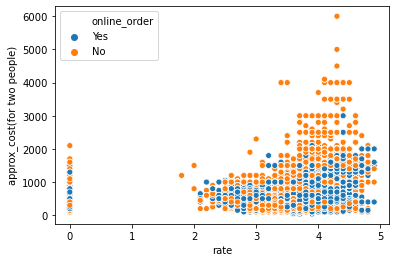

In [73]:
#checking the relation between cost for two people and the rating done by the people
sns.scatterplot(y='approx_cost(for two people)', x='rate', data=df, hue='online_order')

In [74]:
#analysing the relation between the number of votes and whether the order is online or not
px.box(df,y='votes', x='online_order')

In [75]:
#analysing the relation between the cost for two people and whether the order is online or not
px.box(df,y='approx_cost(for two people)', x='online_order')

In [77]:
df['approx_cost(for two people)'].max()

6000

In [78]:
df['approx_cost(for two people)'].min()

40

In [79]:
df[df['approx_cost(for two people)']==6000]

url  \
19139  https://www.zomato.com/bangalore/le-cirque-sig...   
45618  https://www.zomato.com/bangalore/le-cirque-sig...   

                                                 address  \
19139  The Leela Palace, 23, Old Airport Road, Bangalore   
45618  The Leela Palace, 23, Old Airport Road, Bangalore   

                                         name online_order book_table  rate  \
19139  Le Cirque Signature - The Leela Palace           No        Yes   4.3   
45618  Le Cirque Signature - The Leela Palace           No        Yes   4.3   

       votes                         phone          location    rest_type  \
19139    126  080 30571234\r\n080 30571540  Old Airport Road  Fine Dining   
45618    128    080 30571234\n080 30571540  Old Airport Road  Fine Dining   

                                              dish_liked         cuisines  \
19139  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  French, Italian   
45618  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  French, Italian   

       approx_cost(for two people)  \
19139                         6000   
45618                         6000   

                                            reviews_list menu_item  \
19139  [('Rated 5.0', 'RATED\n  Awesome would be an u...        []   
45618  [('Rated 5.0', 'RATED\n  Awesome would be an u...        []   

      listed_in(type)   listed_in(city)  
19139        Dine-out       Indiranagar  
45618        Dine-out  Old Airport Road

In [81]:
#top 10 most expensive restaurants
df['approx_cost(for two people)'].nlargest(10)

19139    6000
45618    6000
40266    5000
41591    4500
42141    4500
37715    4100
39125    4100
39416    4100
40262    4100
6104     4000
Name: approx_cost(for two people), dtype: int32

In [95]:
data=df.copy()

In [96]:
data.set_index('name', inplace=True)

In [97]:
data['approx_cost(for two people)'].nlargest(10)

name
Le Cirque Signature - The Leela Palace    6000
Le Cirque Signature - The Leela Palace    6000
Royal Afghan - ITC Windsor                5000
Malties - Radisson Blu                    4500
Malties - Radisson Blu                    4500
La Brasserie - Le Meridien                4100
La Brasserie - Le Meridien                4100
La Brasserie - Le Meridien                4100
La Brasserie - Le Meridien                4100
Alba - JW Marriott Bengaluru              4000
Name: approx_cost(for two people), dtype: int32

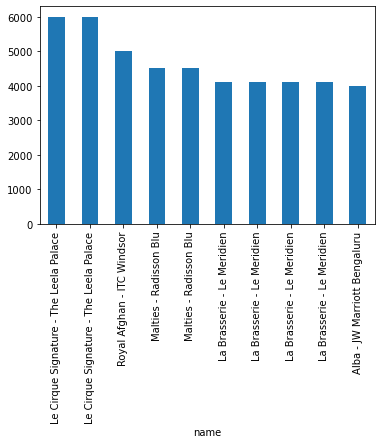

In [102]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()

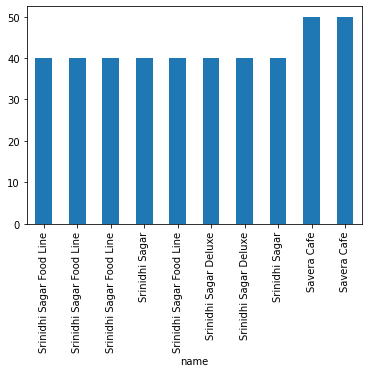

In [103]:
#10 cheapest restaurants
data['approx_cost(for two people)'].nsmallest(10).plot.bar()

In [107]:
#finding all the restaurants that are below 500 or budget restaurants
budget_rest=df[df['approx_cost(for two people)']<=500]

In [108]:
len(budget_rest)

26330

In [109]:
budget_rest.head()

url  \
3   https://www.zomato.com/bangalore/addhuri-udupi...   
10  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
12  https://www.zomato.com/bangalore/the-coffee-sh...   
13  https://www.zomato.com/bangalore/caf-eleven-ba...   
18  https://www.zomato.com/bangalore/t3h-cafe-bana...   

                                              address  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...   
10  12,29 Near PES University Back Gate, D'Souza N...   
12      6th Block, 3rd Stage, Banashankari, Bangalore   
13  111, Sapphire Toys Building, 100 Feet Ring Roa...   
18  504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   

                                                 name online_order book_table  \
3                               Addhuri Udupi Bhojana           No         No   
10  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes         No   
12                                   The Coffee Shack          Yes        Yes   
13                                         Caf-Eleven           No         No   
18                                           T3H Cafe           No         No   

    rate  votes                           phone      location    rest_type  \
3    3.7     88                  +91 9620009302  Banashankari  Quick Bites   
10   4.1    402  080 26724489\r\n+91 7406048982  Banashankari         Cafe   
12   4.2    164                  +91 9731644212  Banashankari         Cafe   
13   4.0    424                    080 49577715  Banashankari         Cafe   
18   3.9     93                  +91 8884726600  Banashankari         Cafe   

                                           dish_liked  \
3                                         Masala Dosa   
10  Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
12  Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
13  Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...   
18     Cheese Maggi, Peri Peri Fries, Pasta Arrabiata   

                               cuisines  approx_cost(for two people)  \
3            South Indian, North Indian                          300   
10                                 Cafe                          500   
12  Cafe, Chinese, Continental, Italian                          500   
13                    Cafe, Continental                          450   
18              Cafe, Italian, American                          300   

                                         reviews_list menu_item  \
3   [('Rated 4.0', "RATED\n  Great food and proper...        []   
10  [('Rated 4.0', 'RATED\n  We ended up here on a...        []   
12  [('Rated 4.0', "RATED\n  Food - 4/5\nAmbience ...        []   
13  [('Rated 2.0', "RATED\n  This is a hookah cafe...        []   
18  [('Rated 4.0', "RATED\n  Happy to see such a c...        []   

   listed_in(type) listed_in(city)  
3           Buffet    Banashankari  
10           Cafes    Banashankari  
12           Cafes    Banashankari  
13           Cafes    Banashankari  
18           Cafes    Banashankari

# Restaurant with rating greater than 4 and are budget restaurants

In [184]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',' ,'')
df['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 43942, dtype: object

In [191]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [202]:
df_affordable=df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]
df_affordable

url  \
10     https://www.zomato.com/bangalore/caf%C3%A9-dow...   
12     https://www.zomato.com/bangalore/the-coffee-sh...   
34     https://www.zomato.com/bangalore/faasos-banash...   
51     https://www.zomato.com/bangalore/shree-cool-po...   
52     https://www.zomato.com/bangalore/corner-house-...   
...                                                  ...   
51312  https://www.zomato.com/bangalore/biryani-kitch...   
51313  https://www.zomato.com/bangalore/stoner-whitef...   
51345  https://www.zomato.com/bangalore/the-wok-shop-...   
51376  https://www.zomato.com/bangalore/nu-tree-1-whi...   
51437  https://www.zomato.com/bangalore/captain-egg-w...   

                                                 address  \
10     12,29 Near PES University Back Gate, D'Souza N...   
12         6th Block, 3rd Stage, Banashankari, Bangalore   
34     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
51     1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...   
52     808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...   
...                                                  ...   
51312  FB 11, 1st Floor, Inorbit Mall, EPIP Area, Whi...   
51313  120/57, Ground Floor, Azeem's Gold Building, W...   
51345  S 26, 2nd Floor, Phoenix Market City, Whitefie...   
51376  12th Floor, Gamma Building, Sigma Soft Tech Pa...   
51437  V R Bengaluru Mall, Mahadevapura Main Rd, Whit...   

                                                    name online_order  \
10     CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes   
12                                      The Coffee Shack          Yes   
34                                                Faasos          Yes   
51                                      Shree Cool Point          Yes   
52                                Corner House Ice Cream           No   
...                                                  ...          ...   
51312                                    Biryani Kitchen          Yes   
51313                                             Stoner          Yes   
51345                                       The Wok Shop          Yes   
51376                                            nu.tree          Yes   
51437                                        Captain Egg           No   

      book_table  rate  votes                           phone      location  \
10            No   4.1    402  080 26724489\r\n+91 7406048982  Banashankari   
12           Yes   4.2    164                  +91 9731644212  Banashankari   
34            No   4.2    415                  +91 7700020020  Banashankari   
51            No   4.1     28                  +91 9900617124   Vijay Nagar   
52            No   4.3    345  080 26713965\r\n+91 9845444155  Banashankari   
...          ...   ...    ...                             ...           ...   
51312         No   4.3    634                    080 28029555    Whitefield   
51313         No   4.3    549                    080 49652126    Whitefield   
51345         No   4.2    221                  +91 8067266088    Whitefield   
51376         No   4.2     52                  +91 8310393035    Whitefield   
51437         No   4.1     18  +91 7622934444\n+91 9909000096    Whitefield   

                  rest_type  \
10                     Cafe   
12                     Cafe   
34              Quick Bites   
51              Quick Bites   
52           Dessert Parlor   
...                     ...   
51312            Food Court   
51313  Dessert Parlor, Cafe   
51345           Quick Bites   
51376           Quick Bites   
51437            Food Court   

                                              dish_liked  \
10     Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
12     Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
34     Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
51                                                   NaN   
52     Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...   
...                                                 

In [196]:
len(df_affordable['name'].unique())

372

In [194]:
# So there are a total of 372 restaurants that are afforable as well as have a rating greater than 4 

# various affordable restaurants at different locations in Bangalore

In [218]:
df_affordable.groupby('location')['name'].count()

location
BTM                              174
Banashankari                      45
Banaswadi                          1
Bannerghatta Road                 35
Basavanagudi                      73
Basaveshwara Nagar                 3
Bellandur                         29
Brigade Road                      65
Brookefield                       36
Church Street                     34
City Market                        4
Commercial Street                 13
Cunningham Road                   21
Domlur                            23
Electronic City                    4
Frazer Town                       36
HSR                              107
Hennur                             9
Hosur Road                         6
ITPL Main Road, Whitefield         6
Indiranagar                      151
JP Nagar                          62
Jayanagar                        204
Jeevan Bhima Nagar                23
Kalyan Nagar                      49
Kammanahalli                      18
Koramangala                  

In [219]:
location=df_affordable.groupby('location')['name'].count().index
location

Index(['BTM', 'Banashankari', 'Banaswadi', 'Bannerghatta Road', 'Basavanagudi',
       'Basaveshwara Nagar', 'Bellandur', 'Brigade Road', 'Brookefield',
       'Church Street', 'City Market', 'Commercial Street', 'Cunningham Road',
       'Domlur', 'Electronic City', 'Frazer Town', 'HSR', 'Hennur',
       'Hosur Road', 'ITPL Main Road, Whitefield', 'Indiranagar', 'JP Nagar',
       'Jayanagar', 'Jeevan Bhima Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala', 'Koramangala 1st Block', 'Koramangala 2nd Block',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block',
       'Koramangala 8th Block', 'Lavelle Road', 'MG Road', 'Majestic',
       'Malleshwaram', 'Marathahalli', 'Nagawara', 'New BEL Road',
       'Old Airport Road', 'Race Course Road', 'Rajajinagar', 'Residency Road',
       'Richmond Road', 'Sadashiv Nagar', 'Sahakara Nagar', 'Sanjay Nagar',
       'Sarjapur Road', 'Seshadripuram', 'Shivajinagar', 'St. Marks 

In [211]:
#as there can be more than one restaurant for the same chain in the same location
len(df_affordable[df_affordable['location']=='BTM']['name'].unique())

28

In [220]:
no_of_rest=list()
for i in range(len(df_affordable.groupby('location')['name'].count())):
    no_of_rest.append(len(df_affordable[df_affordable['location']==location[i]]['name'].unique()))

In [221]:
no_of_rest

[28,
 16,
 1,
 9,
 24,
 2,
 10,
 6,
 9,
 3,
 1,
 2,
 2,
 4,
 3,
 11,
 35,
 2,
 1,
 2,
 37,
 21,
 42,
 7,
 17,
 5,
 1,
 8,
 1,
 11,
 42,
 9,
 14,
 2,
 3,
 1,
 5,
 26,
 21,
 2,
 11,
 3,
 2,
 7,
 7,
 3,
 1,
 1,
 3,
 10,
 6,
 1,
 5,
 3,
 4,
 2,
 3,
 2,
 18,
 2]

In [224]:
location_df=pd.DataFrame(zip(location, no_of_rest))

In [226]:
location_df.head()

0   1
0                BTM  28
1       Banashankari  16
2          Banaswadi   1
3  Bannerghatta Road   9
4       Basavanagudi  24

In [227]:
# The table location_df shows the number of unique restaurants irrespective of the same restaurant chains in any location in bangalore

#  Finding the best budget restaurants in any location in bangalore and foodie locations

In [242]:
def budget_rest(location_, type_):
   return df[(df['rate']>4) & (df['location']==location_) & (df['approx_cost(for two people)']<=400) & (df['rest_type']==type_)]['name'].unique()

In [243]:
budget_rest('BTM', 'Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

In [247]:
foodie_locations=df['location'].value_counts()[0:20]
foodie_locations

BTM                      4261
Koramangala 5th Block    2381
HSR                      2128
Indiranagar              1936
JP Nagar                 1849
Jayanagar                1718
Whitefield               1693
Marathahalli             1503
Bannerghatta Road        1324
Koramangala 6th Block    1111
Koramangala 7th Block    1089
Brigade Road             1084
Bellandur                1078
Koramangala 1st Block     965
Electronic City           964
Sarjapur Road             919
Ulsoor                    901
Koramangala 4th Block     864
MG Road                   836
Banashankari              805
Name: location, dtype: int64

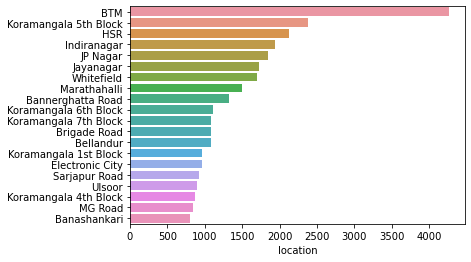

In [248]:
sns.barplot(x=foodie_locations, y=foodie_locations.index)

# Geospatial analysis

In [400]:
locations=pd.DataFrame({'Name': df['location'].unique()})

In [401]:
locations.head()

Name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [402]:
len(locations)

92

In [252]:
!pip install geopy

In [256]:
from geopy.geocoders import Nominatim

In [258]:
geolocator=Nominatim(user_agent='app')

In [403]:
lat_lon=list()
for location in locations['Name']:
    loc_ation=geolocator.geocode(location)
    if loc_ation==None:
        lat_lon.append(np.nan)
    else:
        lat_lon.append((loc_ation.latitude, loc_ation.longitude))

In [404]:
lat_lon

[(15.8876779, 75.7046777),
 (13.8345913, 75.7339359),
 (12.4172633, 76.6711361),
 (27.64392675, 83.05280519687284),
 (12.906816899999999, 77.56352473621337),
 (12.9274413, 77.5155224),
 (22.8359967, 69.3405962),
 (12.9055682, 77.5455438),
 (12.2655944, 76.6465404),
 (12.9791198, 77.5912997),
 (22.94149925, 88.63557671777318),
 (12.9353798, 77.6014074),
 (45.9560231, -112.498564),
 (12.8667841, 77.5347037),
 (12.9089453, 77.6239038),
 (19.060047150000003, 72.92375205185107),
 (-6.1938201, 106.8920008),
 (12.9244803, 77.6502737),
 (12.9489339, 77.5968273),
 (19.2306891, 78.2300806),
 (13.2923988, 77.7519261),
 (43.9849475, -66.1215314),
 (18.1475, 41.538889),
 (12.9552572, 77.6984163),
 (13.2923988, 77.7519261),
 (12.93577245, 77.66676103753434),
 (44.3730577, -71.6118577),
 (12.9791198, 77.5912997),
 (42.810397, -81.8348464),
 (12.9732913, 77.6404672),
 (12.9317704, 77.6228514),
 (12.996845, 77.6130165),
 (29.4534927, -98.6440138),
 (40.28745, -76.964526),
 (40.7652844, -76.373824),
 (5

In [411]:
locations['Geo_loc']=lat_lon
locations

Name                                  Geo_loc
0                    Banashankari                 (15.8876779, 75.7046777)
1                    Basavanagudi                 (13.8345913, 75.7339359)
2                     Mysore Road                 (12.4172633, 76.6711361)
3                       Jayanagar         (27.64392675, 83.05280519687284)
4              Kumaraswamy Layout  (12.906816899999999, 77.56352473621337)
5            Rajarajeshwari Nagar                 (12.9274413, 77.5155224)
6                     Vijay Nagar                 (22.8359967, 69.3405962)
7                     Uttarahalli                 (12.9055682, 77.5455438)
8                        JP Nagar                 (12.2655944, 76.6465404)
9                 South Bangalore                 (12.9791198, 77.5912997)
10                    City Market         (22.94149925, 88.63557671777318)
11              Bannerghatta Road                 (12.9353798, 77.6014074)
12                            BTM                (45.9560231, -112.498564)
13                Kanakapura Road                 (12.8667841, 77.5347037)
14                   Bommanahalli                 (12.9089453, 77.6239038)
15                 CV Raman Nagar  (19.060047150000003, 72.92375205185107)
16                Electronic City                (-6.1938201, 106.8920008)
17                  Sarjapur Road                 (12.9244803, 77.6502737)
18                  Wilson Garden                 (12.9489339, 77.5968273)
19                   Shanti Nagar                 (19.2306891, 78.2300806)
20          Koramangala 5th Block                 (13.2923988, 77.7519261)
21                  Richmond Road                (43.9849475, -66.1215314)
22                            HSR                     (18.1475, 41.538889)
23                   Marathahalli                 (12.9552572, 77.6984163)
24          Koramangala 7th Block                 (13.2923988, 77.7519261)
25                      Bellandur         (12.93577245, 77.66676103753434)
26                     Whitefield                (44.3730577, -71.6118577)
27                 East Bangalore                 (12.9791198, 77.5912997)
28               Old Airport Road                 (42.810397, -81.8348464)
29                    Indiranagar                 (12.9732913, 77.6404672)
30          Koramangala 1st Block                 (12.9317704, 77.6228514)
31                    Frazer Town                  (12.996845, 77.6130165)
32                        MG Road                (29.4534927, -98.6440138)
33                   Brigade Road                   (40.28745, -76.964526)
34                   Lavelle Road                 (40.7652844, -76.373824)
35                  Church Street                  (51.373656, -0.1042366)
36                         Ulsoor                 (12.9778793, 77.6246697)
37                 Residency Road                 (36.1014935, 44.6514938)
38                   Shivajinagar           (18.5322493, 73.8499601124847)
39                  Infantry Road                (41.3986533, -82.4199709)
40                 St. Marks Road                 (52.5845468, -2.1361304)
41                Cunningham Road                (46.0951178, -122.823712)
42               Race Course Road                (-33.8687441, 18.5137421)
43              Commercial Street                 (51.5164765, -0.0728317)
44                  Vasanth Nagar  (12.988721250000001, 77.58516877601824)
45                         Domlur                 (12.9624669, 77.6381958)
46          Koramangala 8th Block                 (12.9417812, 77.6160146)
47                        Ejipura                  (12.945245, 77.6269144)
48             Jeevan Bhima Nagar                 (12.9678074, 77.6568367)
49                Old Madras Road                     (13.16843, 78.40116)
50                  Seshadripuram                 (12.9931876, 77.5753419)
51                   Kammanahalli                 (13.0093455, 77.6377094)
52          Koramangala 6th Block                 (13.

In [269]:
locations.shape

(92, 2)

In [406]:
location_count=df['location'].value_counts().reset_index()
location_count.head()

index  location
0                    BTM      4261
1  Koramangala 5th Block      2381
2                    HSR      2128
3            Indiranagar      1936
4               JP Nagar      1849

In [407]:
location_count.rename(columns={'index':'Name', 'location':'Count'}, inplace=True)

In [408]:
location_count.head()

Name  Count
0                    BTM   4261
1  Koramangala 5th Block   2381
2                    HSR   2128
3            Indiranagar   1936
4               JP Nagar   1849

In [288]:
pd.options.display.max_rows=None

In [409]:
Restaurant_locations=location_count.merge(locations, on='Name', how='left').dropna()
Restaurant_locations

Name  Count  \
0                             BTM   4261   
1           Koramangala 5th Block   2381   
2                             HSR   2128   
3                     Indiranagar   1936   
4                        JP Nagar   1849   
5                       Jayanagar   1718   
6                      Whitefield   1693   
7                    Marathahalli   1503   
8               Bannerghatta Road   1324   
9           Koramangala 6th Block   1111   
10          Koramangala 7th Block   1089   
11                   Brigade Road   1084   
12                      Bellandur   1078   
13          Koramangala 1st Block    965   
14                Electronic City    964   
15                  Sarjapur Road    919   
16                         Ulsoor    901   
17          Koramangala 4th Block    864   
18                        MG Road    836   
19                   Banashankari    805   
20                   Kalyan Nagar    748   
21                   Malleshwaram    658   
22                  Richmond Road    634   
23                   Basavanagudi    628   
24                 Residency Road    608   
25                    Brookefield    581   
26                    Frazer Town    578   
27                  Church Street    550   
28                   Kammanahalli    525   
29                   New BEL Road    523   
30                      Banaswadi    499   
31                   Lavelle Road    499   
32                    Rajajinagar    487   
33                Cunningham Road    475   
34                         Domlur    429   
35                   Shanti Nagar    390   
36               Old Airport Road    386   
37                 St. Marks Road    343   
38              Commercial Street    309   
39                        Ejipura    296   
40                   Shivajinagar    277   
41             Jeevan Bhima Nagar    262   
42                  Vasanth Nagar    252   
43          Koramangala 8th Block    240   
44                  Wilson Garden    203   
45          Koramangala 3rd Block    193   
46             Kumaraswamy Layout    168   
47                       Nagawara    165   
48                   Bommanahalli    157   
49                   Thippasandra    152   
50             Basaveshwara Nagar    145   
51                  Seshadripuram    142   
52                  Infantry Road    140   
53               Race Course Road    137   
54                         Hennur    131   
55                       Majestic    118   
56                    Yeshwantpur    112   
57                     HBR Layout    111   
58  Varthur Main Road, Whitefield     93   
59          Koramangala 2nd Block     92   
60                South Bangalore     91   
61                  Kaggadasapura     91   
62     ITPL Main Road, Whitefield     84   
63                    City Market     78   
64                     Hosur Road     74   
65                    Vijay Nagar     71   
66                 CV Raman Nagar     66   
67                       RT Nagar     64   
68                 Sadashiv Nagar     58   
69                   Sanjay Nagar     50   
70                 Sahakara Nagar     47   
71                    Koramangala     31   
72                 East Bangalore     30   
74                  Langford Town     27   
75                    Sankey Road     26   
76                    Magadi Road     24   
77                      Jalahalli     23   
78                Old Madras Road     22   
79                Kanakapura Road     19   
80                    Mysore Road     18   
81                North Bangalore     14   
82                       KR Puram     11   
83                         Hebbal     10   
84                        Kengeri      9   
85                    Uttarahalli      9   
86              Central Bangalore      8   
87                 West Bangalore      5   
88                      Yelahanka      5   
89           Rajarajeshwari Nagar      2   
90                         Peenya      1   
91                     Na

In [412]:
np.array(Restaurant_locations['Geo_loc'])

array([(45.9560231, -112.498564), (13.2923988, 77.7519261),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (44.3730577, -71.6118577), (12.9552572, 77.6984163),
       (12.9353798, 77.6014074), (13.2923988, 77.7519261),
       (13.2923988, 77.7519261), (40.28745, -76.964526),
       (12.93577245, 77.66676103753434), (12.9317704, 77.6228514),
       (-6.1938201, 106.8920008), (12.9244803, 77.6502737),
       (12.9778793, 77.6246697), (12.93433385, 77.63040639553275),
       (29.4534927, -98.6440138), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (43.9849475, -66.1215314), (13.8345913, 75.7339359),
       (36.1014935, 44.6514938), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (51.373656, -0.1042366),
       (13.0093455, 77.6377094), (13.0435554, 77.5613062),
       (13.0141618, 77.6518539), (40.7652844, -76.373824),
       (12.9882338, 77.554883), (4

In [413]:
latitude,longitude=zip(*np.array(Restaurant_locations['Geo_loc']))

In [414]:
Restaurant_locations['Latitude']=latitude
Restaurant_locations['Longitude']=longitude

In [415]:
Restaurant_locations.head()

Name  Count                    Geo_loc   Latitude  \
0                    BTM   4261  (45.9560231, -112.498564)  45.956023   
1  Koramangala 5th Block   2381   (13.2923988, 77.7519261)  13.292399   
2                    HSR   2128       (18.1475, 41.538889)  18.147500   
3            Indiranagar   1936   (12.9732913, 77.6404672)  12.973291   
4               JP Nagar   1849   (12.2655944, 76.6465404)  12.265594   

    Longitude  
0 -112.498564  
1   77.751926  
2   41.538889  
3   77.640467  
4   76.646540

In [416]:
Restaurant_locations.drop(columns='Geo_loc', inplace=True)

In [417]:
Restaurant_locations.head()

Name  Count   Latitude   Longitude
0                    BTM   4261  45.956023 -112.498564
1  Koramangala 5th Block   2381  13.292399   77.751926
2                    HSR   2128  18.147500   41.538889
3            Indiranagar   1936  12.973291   77.640467
4               JP Nagar   1849  12.265594   76.646540

# basemap of bangalore 

In [379]:
!pip install folium

In [385]:
import folium
from folium.plugins import HeatMap


In [393]:
def generateBaseMap(default_location=[12.973291, 77.640467], default_zoom_start=12):
    basemap=folium.Map(location=default_location, zoom_start=default_zoom_start)
    return basemap

In [394]:
basemap=generateBaseMap()

In [395]:
basemap

#  Heatmap of restaurants at different locations

In [420]:
HeatMap(Restaurant_locations[['Latitude', 'Longitude', 'Count']].values.tolist(), zoom=20, radius=15).add_to(basemap)

In [422]:
basemap

#  Heatmap of the North Indian Cuisine Restaurants

In [424]:
df_NoI=df[df['cuisines']=='North Indian']

In [444]:
north_indian=df_NoI.groupby(['location'])['url'].count().reset_index()

In [445]:
north_indian.head()

location  url
0                BTM  274
1       Banashankari   35
2          Banaswadi    9
3  Bannerghatta Road   60
4       Basavanagudi   17

In [446]:
north_indian.rename(columns={'url':'Counts', 'location':'Name'}, inplace=True)

In [447]:
north_indian.head()

Name  Counts
0                BTM     274
1       Banashankari      35
2          Banaswadi       9
3  Bannerghatta Road      60
4       Basavanagudi      17

In [455]:
north_indian_final=north_indian.merge(Restaurant_locations, on='Name', how='left').dropna()
north_indian_final.drop(columns=['Count'], inplace=True)

In [456]:
north_indian_final.head(20)

Name  Counts   Latitude   Longitude
0                  BTM     274  45.956023 -112.498564
1         Banashankari      35  15.887678   75.704678
2            Banaswadi       9  13.014162   77.651854
3    Bannerghatta Road      60  12.935380   77.601407
4         Basavanagudi      17  13.834591   75.733936
5   Basaveshwara Nagar       1  12.993383   77.538947
6            Bellandur     131  12.935772   77.666761
7         Bommanahalli       6  12.908945   77.623904
8         Brigade Road      39  40.287450  -76.964526
9          Brookefield      42  33.593506  -79.034563
10      CV Raman Nagar       9  19.060047   72.923752
11       Church Street      29  51.373656   -0.104237
12   Commercial Street      11  51.516477   -0.072832
13              Domlur      29  12.962467   77.638196
14      East Bangalore       2  12.979120   77.591300
15             Ejipura      36  12.945245   77.626914
16     Electronic City      46  -6.193820  106.892001
17         Frazer Town      27  12.996845   77.613017
18          HBR Layout       4  13.035870   77.632360
19                 HSR     131  18.147500   41.538889

In [457]:
basemap2=generateBaseMap()

In [458]:
basemap2

In [459]:
HeatMap(north_indian_final[['Latitude', 'Longitude', 'Counts']].values.tolist(), zoom=20, radius=15).add_to(basemap2)

In [460]:
basemap2